## Computer Vision Tutorial

### Index
1.  What is computer vision?
    1. Problems
    2. Applications
    3. Tools
2.  Digital Image: What computers see?
3.  Features
4.  Edge Features
5.  Face detection

### 1. What is computer vision?
Wikipedia: Computer vision is an interdisciplinary scientific field that deals with how computers can be made to gain high-level understanding from digital images or videos. From the perspective of engineering, it seeks to automate tasks that the human visual system can do.

![cv](content/cv.png "Computer Vision")

#### Problems
1. Recognition
   1. Classification
   2. Detection/Localization
   3. Identification
   4. Segmentation
   5. Retrieval
   6. Pose estimation
   7. OCR
2. Motion analysis
   1. Egomotion
   2. Tracking
3. Scene reconstruction
4. Image resoration

![Computer Vision Tasks](content/problems.png "Computer Vision Tasks")

#### Applications
Automatic inspection, automatic identification, controlling industrial processes, autonomous vehicles and robots, visual surveillance, event detection, computer-human interaction, medical image analysis, topographical analysis etc.

#### Tools
* Signal and Image processing
* Machine learning
* Mathematics
* Geometry


### Digital Image: What computers see?    

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
# Load your picture
image = cv2.imread("data/lena.png")

# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Print information about `image`
print("Type of 'image':", type(image))
print("Shape of 'image':", image.shape)

Type of 'image': <class 'numpy.ndarray'>
Shape of 'image': (512, 512, 3)


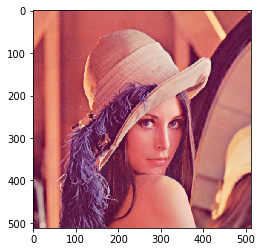

In [11]:
# Show the image
_ = plt.imshow(image)

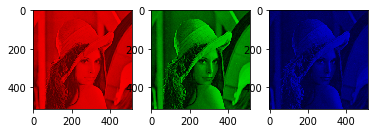

In [12]:
# Show channels
image_r, image_g, image_b = image.copy(), image.copy(), image.copy()
image_r[:, :, [1, 2]] = 0
image_g[:, :, [0, 2]] = 0
image_b[:, :, [0, 1]] = 0

channels = [image_r, image_g, image_b]

for i in range(3):
    ax = plt.subplot(1,3,i+1)
    ax.imshow(channels[i])

In [13]:
# Print the content of the image
print("Top-Left 10x10 Pixels of red channel:\n%s\n"%image[0:10, 0:10, 0])
print("Top-Left 10x10 Pixels of green channel:\n%s\n"%image[0:10, 0:10, 1])
print("Top-Left 10x10 Pixels of blue channel:\n%s\n"%image[0:10, 0:10, 2])

Top-Left 10x10 Pixels of red channel:
[[226 226 223 223 226 226 228 227 227 225]
 [226 226 223 223 226 226 228 227 227 225]
 [226 226 223 223 226 226 228 227 227 225]
 [226 226 223 223 226 226 228 227 227 225]
 [226 226 223 223 226 226 228 227 227 225]
 [227 227 227 222 226 228 226 230 225 228]
 [228 228 225 224 225 229 229 229 227 227]
 [223 223 226 221 227 225 226 228 226 224]
 [225 225 224 224 225 224 229 225 226 225]
 [223 223 224 222 227 225 224 227 228 223]]

Top-Left 10x10 Pixels of green channel:
[[137 137 137 136 138 129 138 134 140 136]
 [137 137 137 136 138 129 138 134 140 136]
 [137 137 137 136 138 129 138 134 140 136]
 [137 137 137 136 138 129 138 134 140 136]
 [137 137 137 136 138 129 138 134 140 136]
 [140 140 131 130 136 133 132 133 136 134]
 [134 134 141 133 134 137 132 128 134 137]
 [133 133 129 132 131 133 129 131 131 137]
 [129 129 133 133 134 134 130 132 139 131]
 [130 130 133 134 128 127 129 130 135 128]]

Top-Left 10x10 Pixels of blue channel:
[[125 125 133 128 1

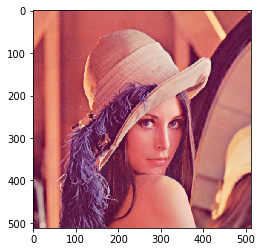

In [14]:
# Add channels
channels_added = image_r + image_g + image_b
_ = plt.imshow(channels_added)

### Image Features

![Image Features](content/features.png "Image Features")

### Edge Detection

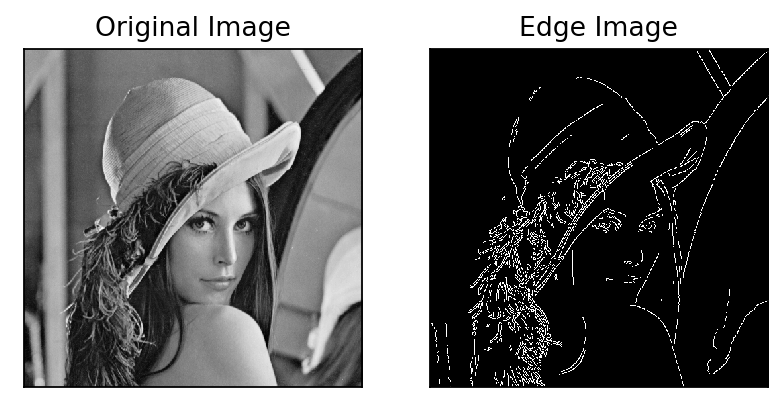

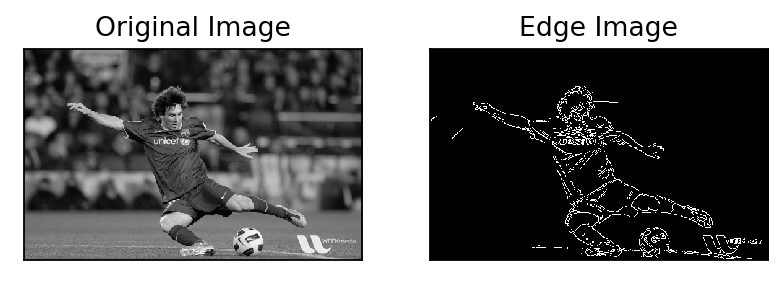

In [15]:
import cv2
import matplotlib.pyplot as plt

# Edge detection on Lena
lena = cv2.imread("data/lena.png")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(lena, 150, 250)

# cv2.imshow("lena", edges)
# cv2.waitKey()

plt.figure(dpi=160)
ax = plt.subplot(121)
ax.imshow(lena, cmap = 'gray')
_ = ax.set_title('Original Image'), ax.set_xticks([]), ax.set_yticks([])

ax = plt.subplot(122)
ax.imshow(edges, cmap = 'gray')
_ = ax.set_title('Edge Image'), ax.set_xticks([]), ax.set_yticks([])

# Edge detection on Messi
messi = cv2.imread("data/messi.jpg")
messi = cv2.cvtColor(messi, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(messi, 150, 250)

plt.figure(dpi=160)
ax = plt.subplot(121)
ax.imshow(messi, cmap = 'gray')
_ = ax.set_title('Original Image'), ax.set_xticks([]), ax.set_yticks([])

ax = plt.subplot(122)
ax.imshow(edges, cmap = 'gray')
_ = ax.set_title('Edge Image'), ax.set_xticks([]), ax.set_yticks([])

### Face Detection with OpenCV

Source: [https://www.geeksforgeeks.org/opencv-python-program-face-detection](https://www.geeksforgeeks.org/opencv-python-program-face-detection/)

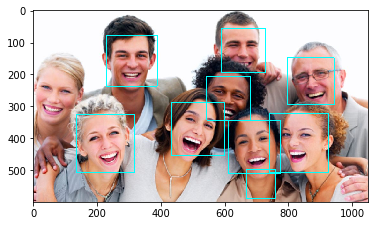

In [16]:
import cv2
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier('data/cascades/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/cascades/haarcascades/haarcascade_eye_tree_eyeglasses.xml')

image = cv2.imread("data/people.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    # To draw a rectangle in a face  
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),2)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the face detection result
_ = plt.imshow(image)
